In [ ]:
from IPython.display import display, Markdown
display(Markdown(filename="README.md"))

# DOUBLE WISHBONE DIRECT ACTING

**STANDALONE TOPOLOGY**

------------------------------------------------

### **Summary**

A **double wishbone** mechanism is a type of  independent suspension mechanism used for automotive. It controls the motion of the wheel assembly via two control arms that are connected to the chassis from one end and to the wheel-carrier on the other end, which resembles a **four-bar linkage**, with the chassis being the ground, and the wheel-carrier being the coupler. The wheel-carrier is connected also to the chassis via a tie-rod that constrains the steering of the wheel-assembly as well. 

This kinematic chain is augmented with a another simple chain that controls the vertical motion of the wheel-assembly, this simple chain can be a direct-acting coil-over that is connected to either one of the control arms and the chassis, or can be a rocker-push/pull rod mechanism that is connected to the coil-over.

![Figure 1 - System Layout](double_wishbone.png)

*Figure 1 - [Double Wishbone Layout](https://github.com/khaledghobashy/uraeus_nmbd_cpp/blob/master/demos/double_wishbone_direct_acting/double_wishbone.png)*

--------------------------------------

### **Topology Layout**

The mechanism consists of 7 Bodies per side, in addition to a steering-rack and the 'Ground' part. Therefore, total system coordinates -including the ground- is $n=n_b\times7 = (7\times2 + 2)\times7 = 16\times7 = 112$, where $n_b$ is the total number of bodies. [^1]

The list of bodies is given below:

- Upper Control Arm **(UCA)**.
- Lower Control Arm **(LCA)**.
- Upright.
- Wheel Hub.
- Tie-Rod.
- CoilOver P1.
- CoilOver P2.
- Steering Rack.

The system connectivity is given in the table below.

<center>

| Joint Name      | Body i        | Body j      |  Joint Type   | $n_c$ |
| :-------------- | :------------ | :---------- | :-----------: | ----: |
| UCA Outer Joint | UCA           | Upright     |   Spherical   |     3 |
| LCA Outer Joint | LCA           | Upright     |   Spherical   |     3 |
| Tie-Rod Outer   | Tie-Rod       | Upright     |   Spherical   |     3 |
| UCA-Chassis     | UCA           | Chassis     |   Revolute    |     5 |
| LCA-Chassis     | LCA           | Chassis     |   Revolute    |     5 |
| Hub Bearing     | Wheel-Hub     | Upright     |   Revolute    |     5 |
| Tie-Rod Inner   | Tie-Rod       | Chassis     |   Universal   |     4 |
| CoilOver Top    | CoilOver P1   | Chassis     |   Universal   |     4 |
| CoilOver Bottom | CoilOver P2   | LCA         |   Universal   |     4 |
| CoilOver Cyl    | CoilOver P1   | CoilOver P2 |  Cylindrical  |     4 |
| Rack-Chassis    | Steering Rack | Chassis     | Translational |     5 |
| **Total**       |               |             |               |    45 |

</center>

</br>

Hence, the total number of constraints equations is:
$$ n_{c} = n_{c_j} + n_{c_p} + n_{c_g} = 85 + (16\times 1) + 6 = 107 $$

where:
* $n_{c_j}$ is the joints constraints.
* $n_{c_p}$ is the euler-parameters normalization constraints.
* $n_{c_g}$ is the ground constraints.

Therefore, the resulting **DOF** is:
$$ n - n_c = 112 - 107 = 5 $$

which can be interpreted in a convenient way as we have:
- One rotational DOF for each wheel.
- One translational DOF in the vertical direction for each wheel.
- One translational DOF for the rack travel.

By providing motion actuators to control these degrees of freedom by applying prescribed displacements, the system is then said to be **fully constrained** and can be simulated as a **kinematically driven system**.

------------------------------------------------------
<br/>

[^1]: The tool uses [euler-parameters](https://en.wikibooks.org/wiki/Multibody_Mechanics/Euler_Parameters) -which is a 4D unit quaternion- to represents bodies orientation in space. This makes the generalized coordinates used to fully define a body in space to be **7,** instead of **6**, it also adds an algebraic equation to the constraints that ensures the unity/normalization of the body quaternion. This is an important remark as the calculations of the degrees-of-freedom depends on it.



---------------------------------------------------------------
---------------------------------------------------------------

# **IMPLEMENTATION**

The system is modeled as full multi-body system (**MBS**) using the [**uraeus.smbd**](https://https://github.com/khaledghobashy/uraeus-smbd) to model the system symbolically, then using [**uraeus.nmbd.cpp**](https://github.com/khaledghobashy/uraeus_nmbd_cpp) to perform the numerical simulation of the modeled system.

The implementation in this notebook can be broken down into main **six** steps as follows:

1. **Colab Machine Setup.** </br>
We first starts by setting up the Colab machine environment by installing the needed tools and packages.

2.  **Symbolic Model Creation.** </br>
Here we create the symbolic topology of the system as well as a symbolic configuration.

3.  **Numerical Environment Generation.** </br>
We then pass our symbolic model to code-generators to generate the code files needed for numerical simulation.

4.  **Numerical Simulation.** </br>
We then use these code files to create our simulation instances and run the numerical simulation.

5.  **Data Post-Processing.** </br>
Now, we can use the raw results' data to evaluate the required characteristics and create plots.

6.  **3D Visualization.** </br>
Finally, we use **uraeus.visenv.babylon** to visualize and animate our system in 3D.
---

*__Note__: If you want to know more about the **uraues.mbd** opensource packages for multi-body dynamics, please visit the package repository at github [here](https://github.com/khaledghobashy/uraeus_mbd).*

---
---

# 1. **Colab Machine Setup**
---

This is a simple demonesteration that walks through the installation steps of the needed software packages on a virtual linux machine provided by [Google Colaboratory](https://colab.research.google.com/). These are more or less the same steps you need to follow in order to setup the environment on your machine.

The list of the stated **uraeus.nmbd.cpp** prerequisites:
- Python 3.6+.
- [Git](https://git-scm.com/downloads), for cloning the project repository.
- [Cmake](https://cmake.org/download/), for build-systems generation. The project requires cmake 3.10 or higher.
- A modern C++ compiler supporting C++17 standards. The project is tested with the GCC 10 compiler on a Linux machine and the Microsoft C++ build tools MSVC on a Windows-10 machine.
- The [uraeus.smbd](https://github.com/khaledghobashy/uraeus-smbd) python package.

The linux machine provided by Colab already has compatible versions of **python**, **git** and **cmake**. We just need to:
1. Install a newer version of the **gcc** compiler.
2. Clone and install the [uraeus.smbd](https://github.com/khaledghobashy/uraeus-smbd) and [uraeus.nmbd.cpp](https://github.com/khaledghobashy/uraeus_nmbd_cpp) packages.

---

*__Note__: Code cells in Jupyter notebooks can accept terminal commands by including an exclamation mark (**!**) before the command. This will be used to setup the virtual machine hosting this notebook.*

---

## Installing GCC 10
The code cell below has the terminal commands needed to install **gcc** 10 and set it as the default compiler for the machine. Select the cell and press **Shift + Enter** to run the cell.

In [1]:
!sudo apt install software-properties-common
!sudo add-apt-repository -y ppa:ubuntu-toolchain-r/test
!sudo apt install gcc-10 g++-10
!sudo update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-10 90 --slave /usr/bin/g++ g++ /usr/bin/g++-10 --slave /usr/bin/gcov gcov /usr/bin/gcov-10

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
software-properties-common is already the newest version (0.99.22.7).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/ubuntu-toolchain-r/test/ubuntu/ jammy main'
Description:
Toolchain test builds; see https://wiki.ubuntu.com/ToolChain

More info: https://launchpad.net/~ubuntu-toolchain-r/+archive/ubuntu/test
Adding repository.
Adding deb entry to /etc/apt/sources.list.d/ubuntu-toolchain-r-ubuntu-test-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/ubuntu-toolchain-r-ubuntu-test-jammy.list
Adding key to /etc/apt/trusted.gpg.d/ubuntu-toolchain-r-ubuntu-test.gpg with fingerprint 60C317803A41BA51845E371A1E9377A2BA9EF27F
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidi

Checking the default version of gcc.

In [2]:
!gcc --version

gcc (Ubuntu 10.5.0-1ubuntu1~22.04) 10.5.0
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



----

## Cloning uraeus packages
The code cell below has the terminal commands needed to clone the needed uraeus packages. Just run the cell.

In [3]:
!git clone https://github.com/khaledghobashy/uraeus_nmbd_cpp.git
!git clone https://github.com/khaledghobashy/uraeus_smbd.git
!git clone https://github.com/khaledghobashy/uraeus_visenv_babylon.git

Cloning into 'uraeus_nmbd_cpp'...
remote: Enumerating objects: 4333, done.
remote: Counting objects: 100% (276/276), done.
remote: Compressing objects: 100% (174/174), done.
remote: Total 4333 (delta 141), reused 229 (delta 102), pack-reused 4057
Receiving objects: 100% (4333/4333), 21.66 MiB | 15.94 MiB/s, done.
Resolving deltas: 100% (1603/1603), done.
Cloning into 'uraeus_smbd'...
remote: Enumerating objects: 10783, done.
remote: Counting objects: 100% (515/515), done.
remote: Compressing objects: 100% (253/253), done.
remote: Total 10783 (delta 281), reused 426 (delta 205), pack-reused 10268
Receiving objects: 100% (10783/10783), 69.58 MiB | 19.35 MiB/s, done.
Resolving deltas: 100% (6163/6163), done.
Cloning into 'uraeus_visenv_babylon'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 145 (delta 75), reused 120 (delta 50), pack-reused 0
Receiving objects: 100% (145/145), 91.22 

## Installing uraeus packages
The code cell below has the terminal commands needed to install the cloned packages via `pip install`. Just run the cell.

In [4]:
!pip install -e uraeus_smbd
!pip install -e uraeus_nmbd_cpp

Obtaining file:///content/uraeus_smbd
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 16.7 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.11.1
    Uninstalling sympy-1.11.1:
      Successfully uninstalled sympy-1.11.1
  Running setup.py develop for uraeus.smbd
Obtaining file:///content/uraeus_nmbd_cpp
  Preparing metadata (setup.py) ... done
  Running setup.py develop for uraeus.nmbd.cpp


---

## Building the binaries of **uraeus.nmbd.cpp**
The code cell below creats a build directory and uses `cmake ..` to generate the build-system files needed to build the binaries in **Release** mode, then invokes `cmake --build .` to start the building process. Again, jsut run the cell.

In [5]:
!cd uraeus_nmbd_cpp/uraeus/nmbd/cpp/engine/ && mkdir -p build && cd build && cmake .. -DCMAKE_BUILD_TYPE=Release && cmake --build .

-- The CXX compiler identification is GNU 10.5.0
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Configuring done
-- Generating done
-- Build files have been written to: /content/uraeus_nmbd_cpp/uraeus/nmbd/cpp/engine/build
[ 12%] Building CXX object src/CMakeFiles/uraeuslib.dir/uraeus/numerics/euler_parameters.cpp.o
[ 25%] Building CXX object src/CMakeFiles/uraeuslib.dir/uraeus/numerics/spatial_algebra.cpp.o
[ 37%] Building CXX object src/CMakeFiles/uraeuslib.dir/uraeus/numerics/geometries.cpp.o
[ 50%] Building CXX object src/CMakeFiles/uraeuslib.dir/uraeus/numerics/helpers.cpp.o
[ 62%] Building CXX object src/CMakeFiles/uraeuslib.dir/uraeus/solvers/utilities.cpp.o
[ 75%] Building CXX object src/CMakeFiles/uraeuslib.dir/uraeus/solvers/sparse_assembler.cpp.o
[ 87%] Building CXX object src/CMakeFiles/uraeuslib.dir/uraeus/sys

---

Finally, we force the active python kernel to restart in order to have access to the intalled uraeus packages.
Running the cell below in Colab will give a warining message **"Your session crashed for an unknown reason"**, this is intentional, so do not worry.

In [ ]:
import os
os._exit(00)

---
---

</br>
</br>
</br>
</br>

---
---

# 2. **Symbolic Model Creation**
---

## **Symbolic Topology**
------------------------

In this section, we create the symbolic topology that captures the topological layout that we discussed earlier.</br>
Defining the topology is very simple. We start by importing the ```standalone_topology``` class and create a new instance that represents our symbolic model. Then we start adding the components we discussed earlier, starting by the bodies, then the joints, actuators and forces, and thats it.</br>
These components will be represented symbolically, and therefore there is no need for any numerical inputs at this step.

The system is stored in a form of a network graph that stores all the data needed for the assemblage of the system equations later. But even before the assemblage process, we can gain helpful insights about our system as well be shown.


In [2]:
# standard library imports
import os

# getting directory of current file and specifying the directory
# where data will be saved
os.makedirs(os.path.join("model", "symenv", "data"), exist_ok=True)
#os.chdir("model")
data_dir = os.path.abspath("model/symenv/data")

In [3]:
# uraeus imports
from uraeus.smbd.systems import standalone_topology, configuration

# ============================================================= #
#                       Symbolic Topology
# ============================================================= #

# Creating the symbolic topology as an instance of the
# standalone_topology class
project_name = "double_wishbone_direct_acting"
sym_model = standalone_topology(project_name)

# Adding Bodies
# =============
sym_model.add_body("uca", mirror=True)
sym_model.add_body("lca", mirror=True)
sym_model.add_body("upright", mirror=True)
sym_model.add_body("upper_strut", mirror=True)
sym_model.add_body("lower_strut" ,mirror=True)
sym_model.add_body("tie_rod", mirror=True)
sym_model.add_body("hub", mirror=True)
sym_model.add_body("rack")

# Adding Joints
# =============
sym_model.add_joint.spherical("uca_upright", "rbr_uca", "rbr_upright", mirror=True)
sym_model.add_joint.spherical("lca_upright", "rbr_lca", "rbr_upright", mirror=True)
sym_model.add_joint.spherical("tie_upright", "rbr_tie_rod", "rbr_upright", mirror=True)

sym_model.add_joint.revolute("uca_chassis", "rbr_uca", "ground", mirror=True)
sym_model.add_joint.revolute("lca_chassis", "rbr_lca", "ground", mirror=True)
sym_model.add_joint.revolute("hub_bearing", "rbr_upright", "rbr_hub", mirror=True)

sym_model.add_joint.universal("strut_chassis", "rbr_upper_strut", "ground", mirror=True)
sym_model.add_joint.universal("strut_lca", "rbr_lower_strut", "rbr_lca", mirror=True)
sym_model.add_joint.universal("tie_steering", "rbr_tie_rod", "rbs_rack", mirror=True)

sym_model.add_joint.cylinderical("strut", "rbr_upper_strut", "rbr_lower_strut", mirror=True)
sym_model.add_joint.translational("rack_joint", "rbs_rack", "ground")

# Adding Actuators
# ================
sym_model.add_actuator.translational_actuator("rack_travel", "jcs_rack_joint")
sym_model.add_actuator.rotational_actuator("wheel_lock", "jcr_hub_bearing", mirror=True)
sym_model.add_actuator.absolute_locator("wheel_travel", "rbr_hub", "ground", "z", mirror=True)

# Adding Forces
# =============
sym_model.add_force.TSDA("strut", "rbr_upper_strut", "rbr_lower_strut", mirror=True)
sym_model.add_force.generic_load("tire", "rbr_hub", mirror=True)

### **Symbolic Characterstics**

#### Topology Graph
Visualizing the connectivity of the system as a network graph, where the nodes represent the bodies, and the edges represent the joints, forces and/or actuators between the bodies.

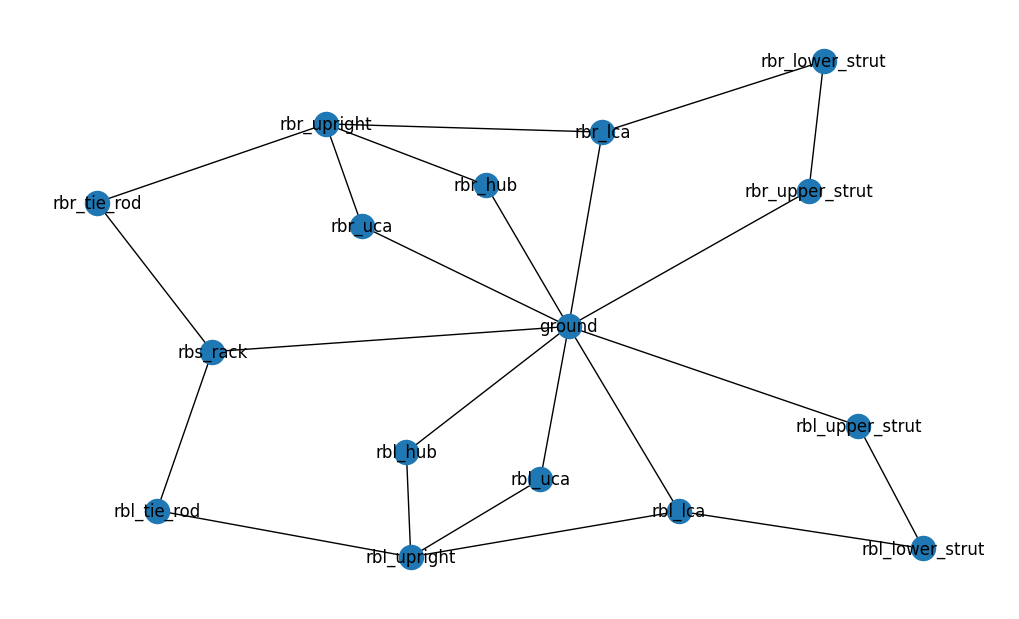

In [4]:
sym_model.topology.draw_constraints_topology()

Checking the system"s number of generalized coordinates $n$ and number of constraints $n_c$.

In [5]:
sym_model.topology.n, sym_model.topology.nc

(112, 112)

### **Assembling**

This is the last step of the symbolic building process, where we make the system starts the assemblage process of the governing equations, which will be used then in the code generation for the numerical simulation, and also can be used for further symbolic manipulations.</br>

*Note: The equations" notations will be discussed in the tool documentation files.*

In [6]:
# Assembling and Saving model
sym_model.save(data_dir)
sym_model.assemble()

#### Checking the System Equations

In [7]:
sym_model.topology.pos_equations

Matrix([
[                                                                                                                                                                   -A({P_{ground}})*{\bar{u}^{ground}_{jcr_uca_chassis}} + A({P_{rbr_uca}})*{\bar{u}^{rbr_uca}_{jcr_uca_chassis}} - {R_{ground}} + {R_{rbr_uca}}],
[                                                                                                                                                                                               Mbar_rbr_uca_jcr_uca_chassis[:,(0, 1)].T*A({P_{rbr_uca}}).T*A({P_{ground}})*Mbar_ground_jcr_uca_chassis[:,(2, 3)]],
[                                                                                                                                                                                               Mbar_rbr_uca_jcr_uca_chassis[:,(1, 2)].T*A({P_{rbr_uca}}).T*A({P_{ground}})*Mbar_ground_jcr_uca_chassis[:,(2, 3)]],
[                                                                  

---------------------------------------------------------------
---------------------------------------------------------------

## **Symbolic Configuration**
---------------------------
In this step we define a symbolic configuration of our symbolic topology. As you may have noticed in the symbolic topology building step, we only cared about the **_topology_**, thats is the system bodies and their connectivity, and we did not care explicitly with how these components are configured in space.</br>

In order to create a valid numerical simulation session, we have to provide the system with its numerical configuration needed, for example, the joints" locations and orientations. The symbolic topology in its raw form will require you to manually enter all these numerical arguments, which can be cumbersome even for smaller systems. This can be checked by checking the configuration inputs of the symbolic configuration as ```sym_config.config.input_nodes```

Here we start by stating the symbolic inputs we wish to use instead of the default inputs set, and then we define the relation between these newly defined arguments and the original ones.

**_The details of this process will be provided in the documentation._**

In [8]:
# ============================================================= #
#                     Symbolic Configuration
# ============================================================= #

# Symbolic configuration name.
config_name = "%s_cfg"%project_name

# Symbolic configuration instance.
sym_config = configuration(config_name, sym_model)

### Configuration Inputs

In [9]:
# Adding the desired set of UserInputs
# ====================================

# Upper Control Arm Points
# ========================
sym_config.add_point.UserInput("ucaf", mirror=True)
sym_config.add_point.UserInput("ucar", mirror=True)
sym_config.add_point.UserInput("ucao", mirror=True)

# Lower Control Arm Points
# ========================
sym_config.add_point.UserInput("lcaf", mirror=True)
sym_config.add_point.UserInput("lcar", mirror=True)
sym_config.add_point.UserInput("lcao", mirror=True)

# Tie-Rod Points
# ==============
sym_config.add_point.UserInput("tro", mirror=True)
sym_config.add_point.UserInput("tri", mirror=True)

# Spring-Damper Points
# ====================
sym_config.add_point.UserInput("strut_chassis", mirror=True)
sym_config.add_point.UserInput("strut_lca", mirror=True)
sym_config.add_point.UserInput("strut_mid", mirror=True)

# Wheel Center Points
# ===================
sym_config.add_point.UserInput("wc", mirror=True)
sym_config.add_point.UserInput("wc1", mirror=True)
sym_config.add_point.UserInput("wc2", mirror=True)

# Guiding Global Axes
# ===================
sym_config.add_vector.UserInput("x")
sym_config.add_vector.UserInput("y")
sym_config.add_vector.UserInput("z")

# Scalar Variables
# ================
sym_config.add_scalar.UserInput("strut_freelength")


### Configuration Releations

In [10]:
# Defining Relations between original topology inputs
# and our desired UserInputs.
# ===================================================

# Defining Relations
# ==================
sym_config.add_point.Centered("strut_mid", ("hpr_strut_chassis", "hpr_strut_lca"), mirror=True)

# UCA_Upright Spherical joint
# ===========================
sym_config.add_relation.Equal_to("pt1_jcr_uca_upright", ("hpr_ucao",), mirror=True)
sym_config.add_relation.Equal_to("ax1_jcr_uca_upright", ("vcs_z",), mirror=True)

# LCA_Upright Spherical joint
# ===========================
sym_config.add_relation.Equal_to("pt1_jcr_lca_upright", ("hpr_lcao",), mirror=True)
sym_config.add_relation.Equal_to("ax1_jcr_lca_upright", ("vcs_z",), mirror=True)

# TieRod_Upright Spherical joint
# ==============================
sym_config.add_relation.Equal_to("pt1_jcr_tie_upright", ("hpr_tro",), mirror=True)
sym_config.add_relation.Equal_to("ax1_jcr_tie_upright", ("vcs_z",), mirror=True)

# Upper Control Arm Revolute Joint:
# =================================
sym_config.add_relation.Centered("pt1_jcr_uca_chassis", ("hpr_ucaf","hpr_ucar"), mirror=True)
sym_config.add_relation.Oriented("ax1_jcr_uca_chassis", ("hpr_ucaf","hpr_ucar"), mirror=True)

# Lower Control Arm Revolute Joint:
# =================================
sym_config.add_relation.Centered("pt1_jcr_lca_chassis", ("hpr_lcaf","hpr_lcar"), mirror=True)
sym_config.add_relation.Oriented("ax1_jcr_lca_chassis", ("hpr_lcaf","hpr_lcar"), mirror=True)

# Wheel Hub Revolute Joint:
# =========================
sym_config.add_relation.Equal_to("pt1_jcr_hub_bearing", ("hpr_wc",), mirror=True)
sym_config.add_relation.Equal_to("ax1_jcr_hub_bearing", ("vcs_y",), mirror=True)

# Strut-Chassis Universal Joint:
# ==============================
sym_config.add_relation.Equal_to("pt1_jcr_strut_chassis", ("hpr_strut_chassis",), mirror=True)
sym_config.add_relation.Oriented("ax1_jcr_strut_chassis", ("hpr_strut_chassis","hpr_strut_lca"), mirror=True)
sym_config.add_relation.Oriented("ax2_jcr_strut_chassis", ("hpr_strut_lca","hpr_strut_chassis"), mirror=True)

# Strut-LCA Universal Joint:
# ==========================
sym_config.add_relation.Equal_to("pt1_jcr_strut_lca", ("hpr_strut_lca",), mirror=True)
sym_config.add_relation.Oriented("ax1_jcr_strut_lca", ("hpr_strut_chassis","hpr_strut_lca"), mirror=True)
sym_config.add_relation.Oriented("ax2_jcr_strut_lca", ("hpr_strut_lca","hpr_strut_chassis"), mirror=True)

# Tie-Steer Universal Joint:
# ==========================
sym_config.add_relation.Equal_to("pt1_jcr_tie_steering", ("hpr_tri",), mirror=True)
sym_config.add_relation.Oriented("ax1_jcr_tie_steering", ("hpr_tri","hpr_tro"), mirror=True)
sym_config.add_relation.Oriented("ax2_jcr_tie_steering", ("hpr_tro","hpr_tri"), mirror=True)

# Strut Cylinderical Joint:
# =========================
sym_config.add_relation.Equal_to("pt1_jcr_strut", ("hpr_strut_mid",), mirror=True)
sym_config.add_relation.Oriented("ax1_jcr_strut", ("hpr_strut_lca","hpr_strut_chassis"), mirror=True)

# Rack Translational Joint:
# =========================
sym_config.add_relation.Centered("pt1_jcs_rack_joint", ("hpr_tri", "hpl_tri"))
sym_config.add_relation.Oriented("ax1_jcs_rack_joint", ("hpr_tri", "hpl_tri"))

# Wheel_Travel Actuation point:
# =============================
sym_config.add_relation.Equal_to("pt1_mcr_wheel_travel", ("hpr_wc",), mirror=True)


# Strut Force Element:
# ====================
sym_config.add_relation.Equal_to("pt1_far_strut", ("hpr_strut_chassis",), mirror=True)
sym_config.add_relation.Equal_to("pt2_far_strut", ("hpr_strut_lca",), mirror=True)
sym_config.add_relation.Equal_to("far_strut_FL", ("s_strut_freelength",), mirror=True)


# Tire Force Element:
# ===================
sym_config.add_relation.Equal_to("pt1_far_tire", ("hpr_wc",), mirror=True)


### Geometries

Here we start defining basic geometric shapes that can represents the shapes of the bodies in our system. This serves two points:
- Visualization and Animation using the provided uraeus.visenv packages.
- Evaluating the bodies inertia properties from these basic geometries instead of explicit definition.

### Geometries

In [11]:
# Creating Geometries
# ===================
sym_config.add_scalar.UserInput("links_ro")
sym_config.add_scalar.UserInput("strut_outer")
sym_config.add_scalar.UserInput("strut_inner")
sym_config.add_scalar.UserInput("thickness")
sym_config.add_scalar.UserInput("hub_radius")
sym_config.add_scalar.UserInput("tire_radius")
sym_config.add_scalar.UserInput("rack_radius")

# Upper Control Arm
# =================
sym_config.add_geometry.Cylinder_Geometry("uca_c1", ("hpr_ucaf", "hpr_ucao","s_links_ro"), mirror=True)
sym_config.add_geometry.Cylinder_Geometry("uca_c2", ("hpr_ucar", "hpr_ucao","s_links_ro"), mirror=True)
sym_config.add_geometry.Composite_Geometry("uca", ("gmr_uca_c1", "gmr_uca_c2"), mirror=True)
sym_config.assign_geometry_to_body("rbr_uca", "gmr_uca", mirror=True)

# Lower Control Arm
# =================
sym_config.add_geometry.Cylinder_Geometry("lca_c1", ("hpr_lcaf", "hpr_lcao","s_links_ro"), mirror=True)
sym_config.add_geometry.Cylinder_Geometry("lca_c2", ("hpr_lcar", "hpr_lcao","s_links_ro"), mirror=True)
sym_config.add_geometry.Composite_Geometry("lca", ("gmr_lca_c1", "gmr_lca_c2"), mirror=True)
sym_config.assign_geometry_to_body("rbr_lca", "gmr_lca", mirror=True)

# Wheel Upright
# =============
sym_config.add_geometry.Triangular_Prism("upright", ("hpr_ucao","hpr_wc","hpr_lcao","s_thickness"), mirror=True)
sym_config.assign_geometry_to_body("rbr_upright", "gmr_upright", mirror=True)

# Coil-Over Upper Part
# ====================
sym_config.add_geometry.Cylinder_Geometry("upper_strut", ("hpr_strut_chassis","hpr_strut_mid","s_strut_outer"), mirror=True)
sym_config.assign_geometry_to_body("rbr_upper_strut", "gmr_upper_strut", mirror=True)

# Coil-Over Lower Part
# ====================
sym_config.add_geometry.Cylinder_Geometry("lower_strut", ("hpr_strut_mid","hpr_strut_lca","s_strut_inner"), mirror=True)
sym_config.assign_geometry_to_body("rbr_lower_strut", "gmr_lower_strut", mirror=True)

# TieRod
# ======
sym_config.add_geometry.Cylinder_Geometry("tie_rod", ("hpr_tri","hpr_tro","s_links_ro"), mirror=True)
sym_config.assign_geometry_to_body("rbr_tie_rod", "gmr_tie_rod", mirror=True)

# Wheel Hub
# =========
sym_config.add_geometry.Cylinder_Geometry("hub_cyl", ("hpr_wc2","hpr_wc","s_hub_radius"), mirror=True)
sym_config.add_geometry.Cylinder_Geometry("tire", ("hpr_wc1","hpr_wc","s_tire_radius"), mirror=True)
sym_config.add_geometry.Composite_Geometry("hub", ("gmr_hub_cyl", "gmr_tire"), mirror=True)
sym_config.assign_geometry_to_body("rbr_hub", "gmr_hub", mirror=True)

# Steering Rack
# =============
sym_config.add_geometry.Cylinder_Geometry("rack", ("hpr_tri","hpl_tri","s_rack_radius"))
sym_config.assign_geometry_to_body("rbs_rack", "gms_rack", mirror=True)

### Assembling

In [12]:
# Exporing the configuration as a JSON file
sym_config.export_JSON_file(data_dir)

---------------------------------------------------------------
---------------------------------------------------------------

# 3. **NUMERICAL ENVIRONMENT GENERATION**
This step aims to create a valid code that can be used for numerical simulation. We will use the **uraeus.nmbd.cpp** numerical environment to create a valid numerical simulation environment in C++.
Theoretically, the symbolic environment is uncoupled from the simulation environment, which opens the door to create various simulation environments that can be in any language.

## Code-Generation
Now we can use our symbolic model to generate the numerical code that can then be used for numerical simulations. For the **uraeus.nmbd.cpp** numerical environment, we import the `standalone_project` class from the `codegen` module and pass in our symbolic model.
This will generate:
- C++ source and header files representing the topology of our model.
- C++ source and header files for a `Simulation` class exposing only the needed functionalities through a minimal API, that can be used in our `main.cpp`.
- Cython wrappers for the C++ `Simulation` class so it can be accessed through python too.
- CMakeLists.txt for automated cross-platform build-systems generation using CMake, building simulation executable and python extension modules.

In [13]:
# ============================================================= #
#                     Code Generation
# ============================================================= #

from uraeus.nmbd.cpp.codegen import standalone_project
project = standalone_project("model")
project.create_dirs()

project.write_topology_code(sym_model)

Generated CMakeLists.txt at : model/numenv/cpp/CMakeLists.txt
Generated topology header file at : model/numenv/cpp/src/double_wishbone_direct_acting.hpp
Generated topology source file at : model/numenv/cpp/src/double_wishbone_direct_acting.cpp
Generated simulation header file at : model/numenv/cpp/src/simulation.hpp
Generated simulation source file at : model/numenv/cpp/src/simulation.cpp
Generated simulation.pyx at : model/numenv/cpp/cython/simulation.pyx
Generated simulation.pxd at : model/numenv/cpp/cython/simulation.pxd
Generated call_obj.pyx file at model/numenv/cpp/cython
Generated py_obj_wrapper.hpp file at model/numenv/cpp/cython
Generated CMakeLists.txt file at model/numenv/cpp/cython


## Building Process

Generating needed source and header files from the generated cython scripts.

In [14]:
!cd model/numenv/cpp/cython/ && cythonize simulation.pyx call_obj.pyx

Compiling /content/model/numenv/cpp/cython/simulation.pyx because it changed.
[1/1] Cythonizing /content/model/numenv/cpp/cython/simulation.pyx
Compiling /content/model/numenv/cpp/cython/call_obj.pyx because it changed.
[1/1] Cythonizing /content/model/numenv/cpp/cython/call_obj.pyx


### Creating main.cpp
Here we have to write our simulation routine that will be used to produce the simulation executable.
For this model, we only need to specify the name of the `json` file for the system configuration, and specify the desired time period and desired step-size.
For other models we may have to specify the user-defined functions to control motion-actuators and generic force elements defined in our model.

We use the `%%writefile <filename>` magic command to write the content of the cell to the specified file `<filename>`.

In [15]:
%%writefile model/numenv/cpp/src/main.cpp

#include "simulation.hpp"

inline double springForce(double x)
{
    if (x>0){return 181.450*1e6*x;} else {return 0;};
};

inline double damperForce(double v)
{
    return 19*1e6 * v;
};


void ParallelTravel()
{
    std::cout << "\n\n";
    std::cout << "===========================================\n";
    std::cout << "Performing Parallel Wheel Travel Simulation\n";
    std::cout << "===========================================\n";

    std::cout << "\nCalling Solver Default Constructor\n";
    auto sim = Simulation();

    std::cout << "Calling constructFromJSON\n";
    sim.ConstructConfiguration("configuration.json");

    // Setting Actuation Functions
    // ===========================

    // locking wheel spin
    sim.set_UF_mcr_wheel_lock([](double t)->double{return 0;});
    sim.set_UF_mcl_wheel_lock([](double t)->double{return 0;});

    // applying vertical wheel travel
    sim.set_UF_mcr_wheel_travel([](double t)->double{return 467 + 130*std::sin(t);});
    sim.set_UF_mcl_wheel_travel([](double t)->double{return 467 + 130*std::sin(t);});

    // locking the rack travel
    sim.set_UF_mcs_rack_travel([](double t)->double{return 0;});

    // struts stiffness and damping functions

    sim.set_UF_far_strut_Fs(springForce);
    sim.set_UF_fal_strut_Fs(springForce);

    sim.set_UF_far_strut_Fd(damperForce);
    sim.set_UF_fal_strut_Fd(damperForce);

    // simulation period and stepsize
    sim.Solve(2*22./7, 5e-3);

    sim.SaveResults("", "parallel_travel");
};


void OppositeTravel()
{
    std::cout << "\n\n";
    std::cout << "===========================================\n";
    std::cout << "Performing Opposite Wheel Travel Simulation\n";
    std::cout << "===========================================\n";

    std::cout << "\nCalling Solver Default Constructor\n";
    auto sim = Simulation();

    std::cout << "Calling constructFromJSON\n";
    sim.ConstructConfiguration("configuration.json");

    // Setting Actuation Functions

    // locking wheel spin
    sim.set_UF_mcr_wheel_lock([](double t)->double{return 0;});
    sim.set_UF_mcl_wheel_lock([](double t)->double{return 0;});

    // applying vertical wheel travel
    sim.set_UF_mcr_wheel_travel([](double t)->double{return 467 + 130*std::sin(t);});
    sim.set_UF_mcl_wheel_travel([](double t)->double{return 467 - 130*std::sin(t);});

    // locking the rack travel
    sim.set_UF_mcs_rack_travel([](double t)->double{return 0;});

    // struts stiffness and damping functions

    sim.set_UF_far_strut_Fs(springForce);
    sim.set_UF_fal_strut_Fs(springForce);

    sim.set_UF_far_strut_Fd(damperForce);
    sim.set_UF_fal_strut_Fd(damperForce);


    // simulation period and stepsize
    sim.Solve(2*22./7, 5e-3);

    sim.SaveResults("", "opposite_travel");
};

void RackTravel()
{
    std::cout << "\n\n";
    std::cout << "==========================================\n";
    std::cout << "Performing Steering Rack Travel Simulation\n";
    std::cout << "==========================================\n";

    std::cout << "\nCalling Solver Default Constructor\n";
    auto sim = Simulation();

    std::cout << "Calling constructFromJSON\n";
    sim.ConstructConfiguration("configuration.json");

    // Setting Actuation Functions

    // locking wheel spin
    sim.set_UF_mcr_wheel_lock([](double t)->double{return 0;});
    sim.set_UF_mcl_wheel_lock([](double t)->double{return 0;});

    // applying vertical wheel travel
    sim.set_UF_mcr_wheel_travel([](double t)->double{return 467;});
    sim.set_UF_mcl_wheel_travel([](double t)->double{return 467;});

    // locking the rack travel
    sim.set_UF_mcs_rack_travel([](double t)->double{return 50*std::sin(t);});

    // struts stiffness and damping functions

    sim.set_UF_far_strut_Fs(springForce);
    sim.set_UF_fal_strut_Fs(springForce);

    sim.set_UF_far_strut_Fd(damperForce);
    sim.set_UF_fal_strut_Fd(damperForce);


    // simulation period and stepsize
    sim.Solve(2*22./7, 5e-3);

    sim.SaveResults("", "rack_travel");
};


int main()
{

    ParallelTravel();
    OppositeTravel();
    RackTravel();

    return 0;
};


Writing model/numenv/cpp/src/main.cpp


### Building Simulation Binaries
The code cell below invokes `cmake ..` to generate the build-system files needed to build the binaries in **Release** mode, then invokes `cmake --build .` to start the building process.

This will produce a `model` executable and a `simulation.so` python extension module that can be imported as a normal python module. These will be placed in the `/bin` directory

In [16]:
!cd model/numenv/cpp/build && cmake .. -DCMAKE_BUILD_TYPE=Release && cmake --build .

-- The CXX compiler identification is GNU 10.5.0
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
uraeus source directory : /content/uraeus_nmbd_cpp/uraeus/nmbd/cpp/engine/src
current source directory : /content/model/numenv/cpp
-- Found PythonInterp: /usr/bin/python3 (found suitable version "3.10.12", minimum required is "3") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.10.so (found suitable version "3.10.12", minimum required is "3") 
Python 3 Directory : /usr/include/python3.10
-- Configuring done
-- Generating done
-- Build files have been written to: /content/model/numenv/cpp/build
[ 12%] Building CXX object CMakeFiles/model_lib.dir/src/double_wishbone_direct_acting.cpp.o
[ 25%] Building CXX object CMakeFiles/model_lib.dir/src/simulation.cpp.o
[ 37%] Linking CXX static library libmodel_lib.a
[ 37%] Built targ

---
---

# 4. **NUMERICAL SIMULATION**
Now we can advance to the **nuemrical simulation** step. In order to perform our desired simulation, we should first define our model numerical configuration data. These data represents how our model is placed in 3D space, where the bodies are located and how they are oriented as well as the other physical components existing in the system.

At the **Symbolic Configuration** step we defined some **user inputs** and some **relations** that states how our system is configured symbolically. These data is stored in a `.json` file at the `/symenv/data/` directory. All we have to do is to make a copy of this file and fill in our numerical configuration data for our defined `user_inputs`.

This file should be passed to our executable to construct the numerical topology correctly.

In order to provide the numerical configuration data, we have to write a `configuration.json` file and save it at `numenv/cpp/bin/`. Using the `%pycat <filename>` magic command in Colab will open a side tab containing the file content, we can copy the content and past it in anotehr code cell and apply our modifications, then we use the `%%writefile <filename>` magic command to creat the required `configuration.json` file.

Another -more elegant- option is to make use of python's `json` module to load, edit and save `.json` files. The `json` module loads json formatted text as python dictionaries, where we can access and modify our data easily. Then we can use the `json` module again to `dump` our modified data dictionary as json formatted text again and save it to a new file.

In [17]:
%pycat model/symenv/data/double_wishbone_direct_acting_cfg.json

Loading the configuration data using `json` module, and getting access to the `user_inputs` section.

In [18]:
import json

with open("model/symenv/data/double_wishbone_direct_acting_cfg.json", "r") as f:
    json_text = f.read()

data = json.loads(json_text)
user_inputs = data["user_inputs"]

Filling in our numerical configuration data

In [19]:
tire_radius = 467

# Upper Control Arm Points
# ========================
user_inputs["hpr_ucaf"]["args"] = [ -48, 446, 245 + tire_radius]
user_inputs["hpr_ucar"]["args"] = [-268, 478, 196 + tire_radius]
user_inputs["hpr_ucao"]["args"] = [ -53, 716, 215 + tire_radius]

# Lower Control Arm Points
# ========================
user_inputs["hpr_lcaf"]["args"] = [ 223, 307,    0 + tire_radius]
user_inputs["hpr_lcar"]["args"] = [-223, 307,    0 + tire_radius]
user_inputs["hpr_lcao"]["args"] = [ -36, 787, -118 + tire_radius]

# Tie-Rod Points
# ==============
user_inputs["hpr_tri"]["args"] = [-250, 448, 54 + tire_radius]
user_inputs["hpr_tro"]["args"] = [-176, 821,-16 + tire_radius]

# Spring-Damper Points
# ====================
user_inputs["hpr_strut_chassis"]["args"] = [104, 498, 323 + tire_radius]
user_inputs["hpr_strut_lca"]["args"]     = [ 97, 543, -47 + tire_radius]

# Wheel Center Points
# ===================
user_inputs["hpr_wc"]["args"]  = [ 0,  900, 0 + tire_radius]
user_inputs["hpr_wc1"]["args"] = [ 0, 1000, 0 + tire_radius]
user_inputs["hpr_wc2"]["args"] = [ 0,  800, 0 + tire_radius]

# Guiding Global Axes
# ===================
user_inputs["vcs_x"]["args"] = [1, 0, 0]
user_inputs["vcs_y"]["args"] = [0, 1, 0]
user_inputs["vcs_z"]["args"] = [0, 0, 1]

# Scalar Variables
# ================
user_inputs["s_strut_freelength"] = 339

user_inputs["s_tire_radius"] = tire_radius
user_inputs["s_hub_radius"]  = tire_radius * 0.25
user_inputs["s_links_ro"]    = 15
user_inputs["s_strut_inner"] = 25
user_inputs["s_strut_outer"] = 35
user_inputs["s_thickness"]   = 20
user_inputs["s_rack_radius"] = 20


Saving our numerical configuration as `configuration.json` at the required location `numenv/cpp/bin/`.

In [20]:
modified_text = json.dumps(data, indent=4)

with open("model/numenv/cpp/bin/configuration.json", "w") as output:
    output.write(modified_text)

### Run the Simulation Executable

In [21]:
!cd model/numenv/cpp/bin/ && ./model



Performing Parallel Wheel Travel Simulation

Calling Solver Default Constructor
Initiallizing Simulation
Calling constructFromJSON
Constructing Inputs!
map::at
Constructor Lambda has no mapped construction method!
map::at
Constructor Lambda has no mapped construction method!
map::at
Constructor Lambda has no mapped construction method!
map::at
Constructor Lambda has no mapped construction method!
map::at
Constructor Lambda has no mapped construction method!
map::at
Constructor Lambda has no mapped construction method!
map::at
Constructor Lambda has no mapped construction method!
Inputs Constructed!
Constructing Helpers!
Helpers Constructed!
Evaluating Outputs!
map::at
Argument not initialized! UF_mcr_wheel_lock
map::at
Argument not initialized! UF_far_strut_Fs
map::at
Argument not initialized! UF_far_strut_Fd
map::at
Argument not initialized! UF_mcr_wheel_travel
map::at
Argument not initialized! UF_far_tire_F
map::at
Argument not initialized! UF_far_tire_T
Outputs Constructed!

Initi

### Test the generated python extension module

In [22]:
%%writefile model/numenv/cpp/bin/main.py

import numpy as np
from simulation import PySimulation

# creating a model instance of the wrapped simulation class
model = PySimulation()

# constructing the numerical configuration from the modified
# json file.
model.construct_configuration("configuration.json")


# defining python functions for the strut stiffness and damping
# =============================================================
def springForce(x, *args):
    force = x * 181.450*1e6 if x >= 0 else 0
    return force

def damperForce(v, *args):
    force = v * 19*1e6
    return force

model.set_UF_far_strut_Fs(springForce)
model.set_UF_far_strut_Fd(damperForce)

model.set_UF_fal_strut_Fs(springForce)
model.set_UF_fal_strut_Fd(damperForce)

# =================================================================



# =================================================================
#           Performing Parallel Wheel Travel Simulation
# =================================================================

# setting the motion actuation functions as python lambda functions
# =================================================================
model.set_UF_mcr_wheel_lock(lambda t, *args: 0)
model.set_UF_mcl_wheel_lock(lambda t, *args: 0)

model.set_UF_mcr_wheel_travel(lambda t, *args: 467 + 130*np.sin(t))
model.set_UF_mcl_wheel_travel(lambda t, *args: 467 + 130*np.sin(t))

model.set_UF_mcs_rack_travel(lambda t, *args: 0)


# setting the simulation duration and time step-size
# ==================================================
model.solve(2*np.pi, 5*1e-3)

# saving the simulation results
# =============================
model.save_results("", "py_parallel_travel")

# =================================================================



# =================================================================
#           Performing Opposite Wheel Travel Simulation
# =================================================================

# setting the motion actuation functions as python lambda functions
# =================================================================
model.set_UF_mcr_wheel_lock(lambda t, *args: 0)
model.set_UF_mcl_wheel_lock(lambda t, *args: 0)

model.set_UF_mcr_wheel_travel(lambda t, *args: 467 + 130*np.sin(t))
model.set_UF_mcl_wheel_travel(lambda t, *args: 467 - 130*np.sin(t))

model.set_UF_mcs_rack_travel(lambda t, *args: 0)


# setting the simulation duration and time step-size
# ==================================================
model.solve(2*np.pi, 5*1e-3)

# saving the simulation results
# =============================
model.save_results("", "py_opposite_travel")

# =================================================================



# =================================================================
#           Performing Steering Rack Travel Simulation
# =================================================================

# setting the motion actuation functions as python lambda functions
# =================================================================
model.set_UF_mcr_wheel_lock(lambda t, *args: 0)
model.set_UF_mcl_wheel_lock(lambda t, *args: 0)

model.set_UF_mcr_wheel_travel(lambda t, *args: 467)
model.set_UF_mcl_wheel_travel(lambda t, *args: 467)

model.set_UF_mcs_rack_travel(lambda t, *args: 50*np.sin(t))


# setting the simulation duration and time step-size
# ==================================================
model.solve(2*np.pi, 5*1e-3)

# saving the simulation results
# =============================
model.save_results("", "py_rack_travel")

# =================================================================

Writing model/numenv/cpp/bin/main.py


### Run main.py python script

In [23]:
!cd model/numenv/cpp/bin/ && python main.py

Initiallizing Simulation
Constructing Inputs!
map::at
Constructor Lambda has no mapped construction method!
map::at
Constructor Lambda has no mapped construction method!
map::at
Constructor Lambda has no mapped construction method!
map::at
Constructor Lambda has no mapped construction method!
map::at
Constructor Lambda has no mapped construction method!
map::at
Constructor Lambda has no mapped construction method!
map::at
Constructor Lambda has no mapped construction method!
Inputs Constructed!
Constructing Helpers!
Helpers Constructed!
Evaluating Outputs!
map::at
Argument not initialized! UF_mcr_wheel_lock
map::at
Argument not initialized! UF_far_strut_Fs
map::at
Argument not initialized! UF_far_strut_Fd
map::at
Argument not initialized! UF_mcr_wheel_travel
map::at
Argument not initialized! UF_far_tire_F
map::at
Argument not initialized! UF_far_tire_T
Outputs Constructed!

Initializing Model!
Starting Solver ...

Running System Kinematic Analysis: 
[===================================

---
---

# 5. **DATA POST-PROCESSING**
We can load and plot the simulation results easily too. The `SaveResults` method exports the position, velocities and accelerations of the system generalized coordinates as a `name_pos.csv`, `name_vel.csv`, and `name_acc.csv` respectively. These files can be loaded into a `pandas.DataFrame` object easily where we can do what we wish with the data.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
parallel_pos_data = pd.read_csv("model/numenv/cpp/bin/py_parallel_travel_pos.csv", index_col=0)

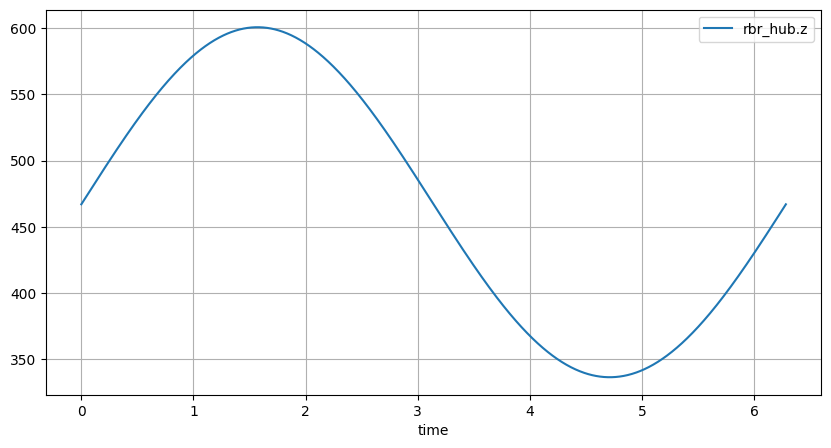

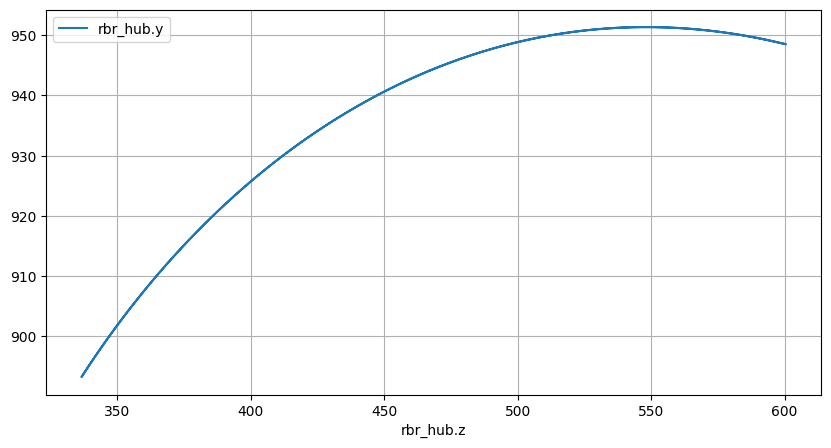

In [26]:
parallel_pos_data.plot(x="time", y="rbr_hub.z", grid=True, figsize=(10,5))
parallel_pos_data.plot(x="rbr_hub.z", y="rbr_hub.y", grid=True, figsize=(10,5))
plt.show()

# 6. **3D Visualization**
An extra step we can do here is to visualize and animate our system in 3D. This can be done using the **uraeus.visenv.babylon** visualization environment, which is a JavaScript-based WebGL visualization environment for visualizing multi-body models created using uraeus.

Making use of the fact that Colab is fully operational virtual linux machine, we can start a python server in the background running the visualization engine, and make use of the jupyter notebook capabilities to embed an iframe inside cell's output.

Just run the cell below, and it should render the visualization environment.

*__Note__: In Colab, you can right-click on a given cell and select **view output fullscreen**, this will open the visualization environment in a fullscreen mode.*

*__Note__: You have to download the `configuration.json` and the `_pos.csv` from the `numenv/cpp/bin/` directory to your machine, as the **uraeus.visenv.babylon** will prompt a window asking for these files on your physical machine when you try to load a model and/or an animation file.*

The method below assumes a Colab session. This will not work on your local machine.

In [27]:
import subprocess
process = subprocess.Popen("cd uraeus_visenv_babylon && python -m http.server 8000",
                     stdout=subprocess.PIPE, stderr=subprocess.PIPE, shell=True)

In [28]:
from google.colab.output import eval_js
print("Click on the link below to open the 'visualization window' in a new tab.")
print(eval_js("google.colab.kernel.proxyPort(8000)"))

Click on the link below to open the 'visualization window' in a new tab.
https://7hn4g3rnkag-496ff2e9c6d22116-8000-colab.googleusercontent.com/


Another way to view the 'visualization window' is to embed it as an `iframe` inside a cell output as below.

In [29]:
from IPython.display import IFrame
IFrame(eval_js("google.colab.kernel.proxyPort(8000)"), 1200, 500)